In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline

# Overview
https://www.kaggle.com/c/titanic/data


based on Logistic Regression @PierianData
The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.



|Variable|Definition|Key|
|------|------|------|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Gender||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|





**Variable Notes**

**pclass**: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age**: 
- Age is fractional if less than 1. 
- If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

# Objectives

see the rate of survivors based on:
- from the total amount
- pclass
- gender
- embarked
- age

In [3]:
# read csv file
titanicdf = pd.read_csv('train.csv')

In [4]:
# check data using .head()
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# check information based on basic information
titanicdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# find the summary of the data
titanicdf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


from here we can already check on the dataset if there's an outlier or not based on the generated values; we can also have the conclusion on what machine learning method we're going to use.


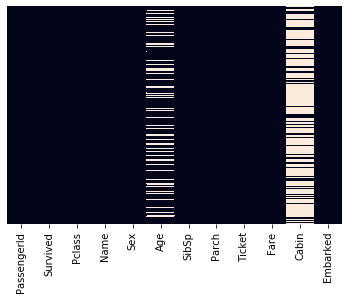

In [7]:
# check for missing data within the dataset
sns.heatmap(titanicdf.isnull(),yticklabels=False,cbar=False)

from the data above we can say majority of the data inside inside Cabin column is missing, so we'll drop it 

In [8]:
# drops the Cabin column
titanicdf = titanicdf.drop(axis=1, columns=['Cabin'])

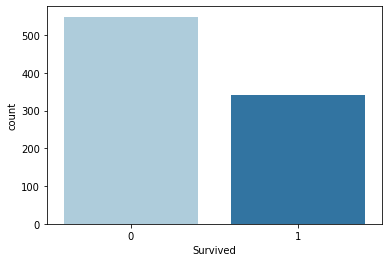

In [9]:
sns.countplot(x='Survived',data=titanicdf,palette='Paired')

total count of people categorized if wether or not they survived; 
0 = No, 1 = Yes

In [10]:
titanicdf[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


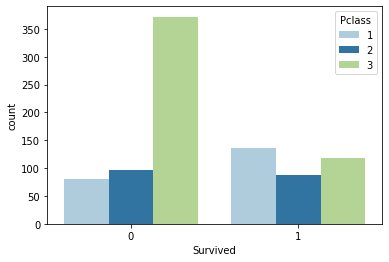

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=titanicdf,palette='Paired')

total count of people categorized if they survived or not based on their **Passenger/Ticket Class**

In [12]:
titanicdf[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


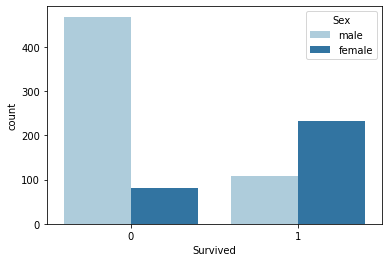

In [13]:
sns.countplot(x='Survived',hue='Sex',data=titanicdf,palette='Paired')

total count of people categorized if they survived or not based on their **Sex**

In [14]:
titanicdf[['Survived', 'Embarked']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


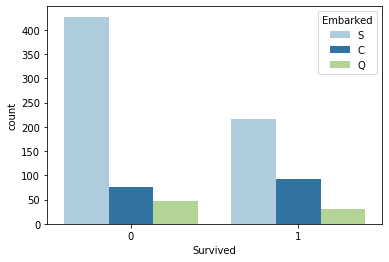

In [15]:
sns.countplot(x='Survived',hue='Embarked',data=titanicdf,palette='Paired')

total count of people categorized if they survived or not based on their **Port of Embarkation**

In [16]:
# for the missing age values, we take the mean of each Pclass age values
titanicdf[['Pclass','Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


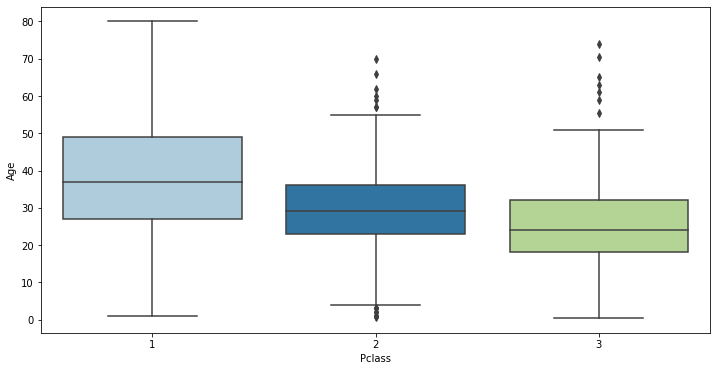

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age',data=titanicdf, palette='Paired')

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

In [19]:
titanicdf['Age'] = titanicdf[['Age','Pclass']].apply(impute_age,axis=1)

for the missing Age, we groupby the data in accordance to Pclass and take their mean, which is then used as alternate data to work by

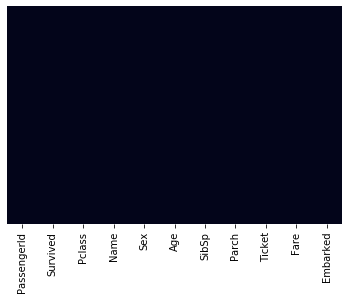

In [20]:
# check on missing data
sns.heatmap(titanicdf.isnull(),yticklabels=False,cbar=False)

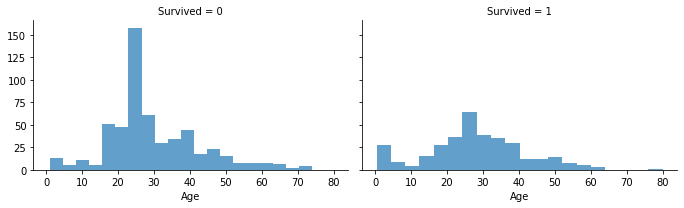

In [35]:
SAge = sns.FacetGrid(titanicdf, col='Survived', height=3, aspect=1.6)
SAge.map(plt.hist, 'Age', alpha=.7, bins=20)

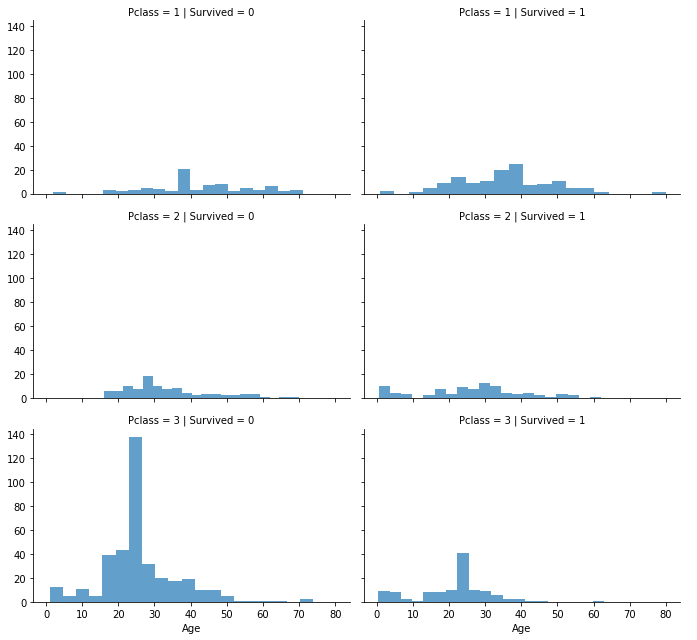

In [36]:
SAPclass = sns.FacetGrid(titanicdf, col='Survived', row='Pclass', height=3, aspect=1.6)
SAPclass.map(plt.hist, 'Age', alpha=.7, bins=20)
SAPclass.add_legend();

# Convertion to Categorical Features

In [39]:
sex = pd.get_dummies(titanicdf['Sex'],drop_first=True)
embark = pd.get_dummies(titanicdf['Embarked'],drop_first=True)

In [40]:
titanicdf.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [41]:
titanicdf = pd.concat([titanicdf, sex, embark], axis =1)

In [42]:
titanicdf.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression

from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(titanicdf.drop('Survived',axis=1), 
                                                    titanicdf['Survived'], test_size=0.30, 
                                                    random_state=101)

from sklearn.linear_model import LogisticRegression

In [48]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Gilgamesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report

**Accuracy** - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. 

Accuracy = TP+TN/TP+FP+FN+TN

**Precision** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Precision = TP/TP+FP

**Recall (Sensitivity)** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. 

Recall = TP/TP+FN

**F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 

https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.83      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267

